# customFunctions.py testing

In this notebook we test the functions implemented in that file.

In first place, we import the file.

In [1]:
import sys
sys.path.append('../')

from src import customFunctions as cf

### Test of `expand_observable()` function:

We need an observable to expand, lets take: $\hat{O}=\hat{Z_0}\otimes\hat{Z_1}$. We create it as an `SparsePauliOp` class instance:

In [8]:
from qiskit.quantum_info import SparsePauliOp

base_observable  = SparsePauliOp.from_list([("ZZ",1)])
print(base_observable)

SparsePauliOp(['ZZ'],
              coeffs=[1.+0.j])


Now, we expand it in order to work with n qubits: $\hat{O}=\hat{Z}_0\hat{Z}_1 ··· \hat{I}_{n-1} \hat{I}_n$

In [ ]:
total_qubits = range(2, 11)

for n_q in total_qubits:
    expanded_observable = cf.expand_observable(base_observable, n_q)
    print(expanded_observable)

SparsePauliOp(['ZZ'],
              coeffs=[1.+0.j])
SparsePauliOp(['ZZI'],
              coeffs=[1.+0.j])
SparsePauliOp(['ZZII'],
              coeffs=[1.+0.j])
SparsePauliOp(['ZZIII'],
              coeffs=[1.+0.j])
SparsePauliOp(['ZZIIII'],
              coeffs=[1.+0.j])
SparsePauliOp(['ZZIIIII'],
              coeffs=[1.+0.j])
SparsePauliOp(['ZZIIIIII'],
              coeffs=[1.+0.j])
SparsePauliOp(['ZZIIIIIII'],
              coeffs=[1.+0.j])
SparsePauliOp(['ZZIIIIIIII'],
              coeffs=[1.+0.j])


### Test of `build_deep_ansatz()` function:

c:\Users\juanl\miniconda3\envs\qiskit-tfm\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


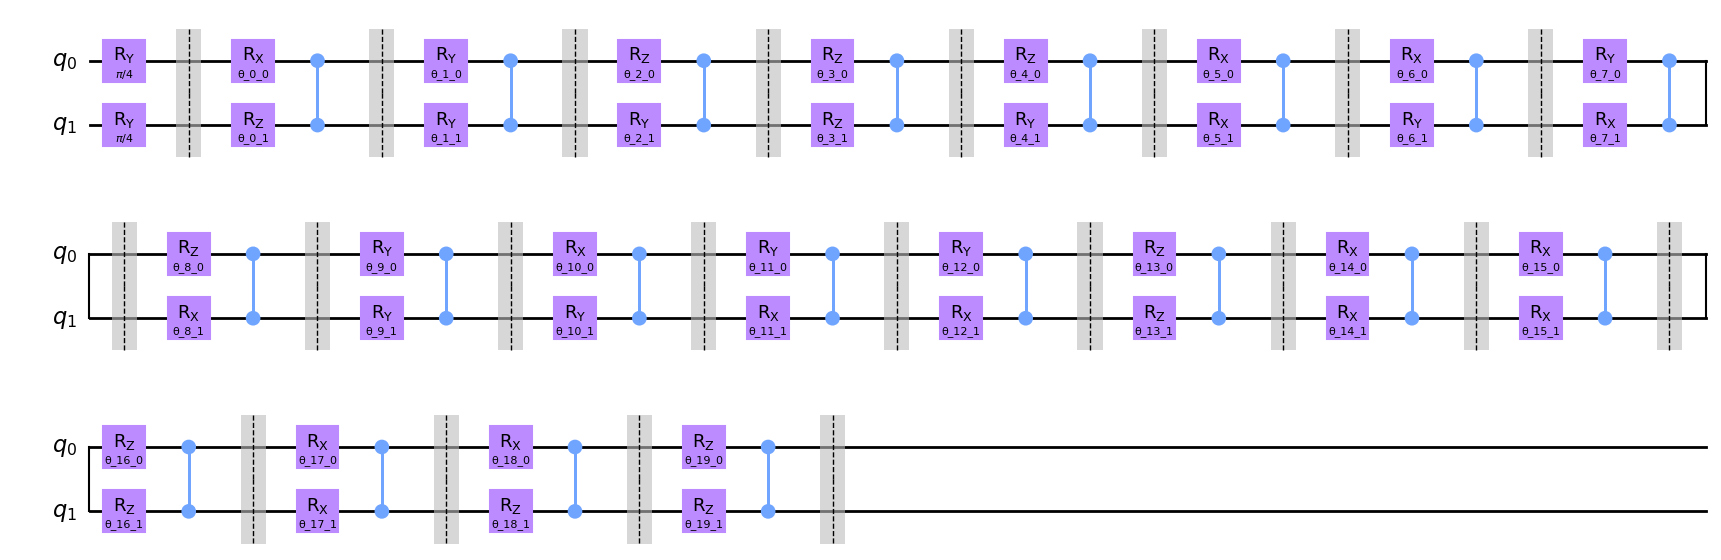

In [18]:
# 2 qubits and default layers per qubit
circuit, num_params = cf.build_deep_ansatz(2)
display(circuit.draw("mpl"))

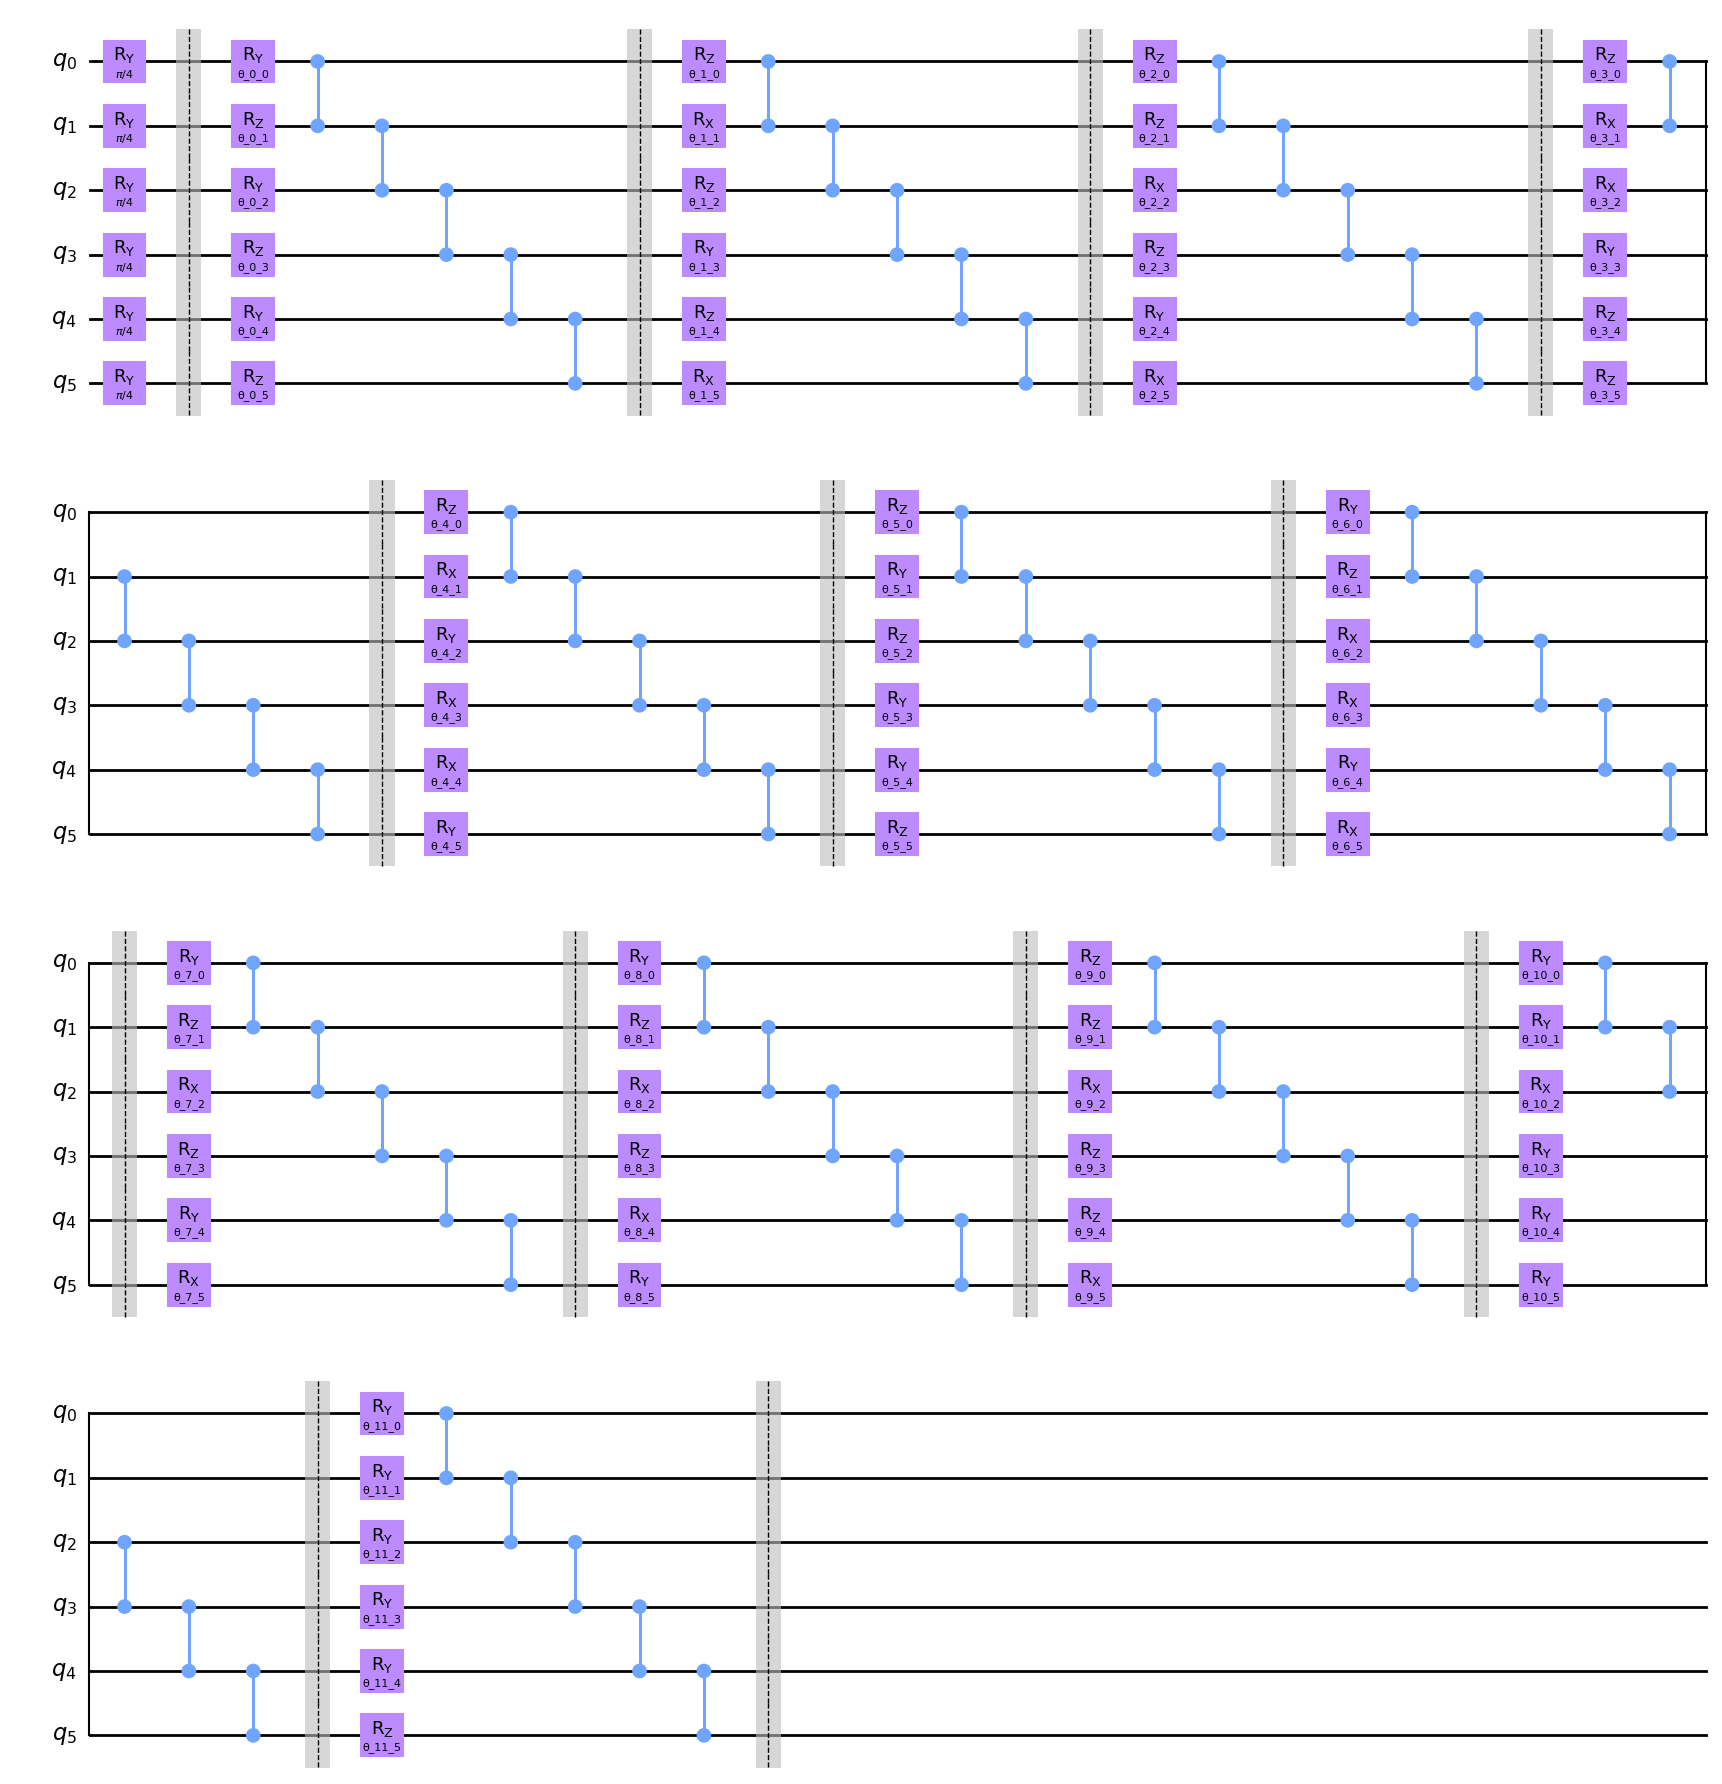

In [20]:
# 6 qubits and 2 layers per qubit
circuit, num_params = cf.build_deep_ansatz(6, layers_per_qubit=2)
display(circuit.draw("mpl"))

### Test of `evaluate_observable()` function:

we use the previous functions to make the needed observable and ansatz:

SparsePauliOp(['ZZ'],
              coeffs=[1.+0.j])


c:\Users\juanl\miniconda3\envs\qiskit-tfm\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


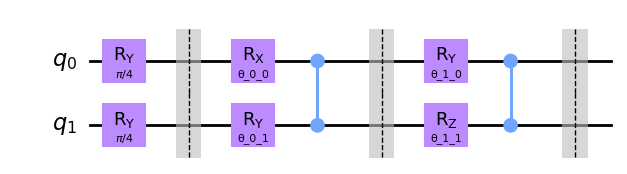

In [21]:
observable  = SparsePauliOp.from_list([("ZZ",1)])
print(observable)


ansatz_circuit, num_params = cf.build_deep_ansatz(2, layers_per_qubit=1)
display(ansatz_circuit.draw("mpl"))

Now we test the function, we have to give some values to the parameters and an `Estimator()` instance:

In [24]:
import numpy as np
from qiskit.primitives import Estimator

params = np.random.random(num_params)
estimator = Estimator()

result = cf.evaluate_observable(params, ansatz_circuit, observable, estimator)

print(result)

0.11938733119319149


### Test of `evaluate_deriv()` function:

Similar to the previuos fucntions, but we include an index to tell the program in which parameter it should derive:

In [25]:
result = cf.evaluate_deriv(params, ansatz_circuit, observable, 0, estimator)

print(result)

-0.1024406393482443
